Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')

# Define the excel file path
excel_file = '/content/glass.xlsx'
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'glass']


In [ ]:
df


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [ ]:
print(df.tail())

          RI     Na   Mg    Al     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [ ]:
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [ ]:
print(df.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [ ]:
#Missing values
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
# Outlier detection using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered



In [ ]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

 Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')

# Define the excel file path
excel_file = '/content/glass.xlsx'
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'glass']


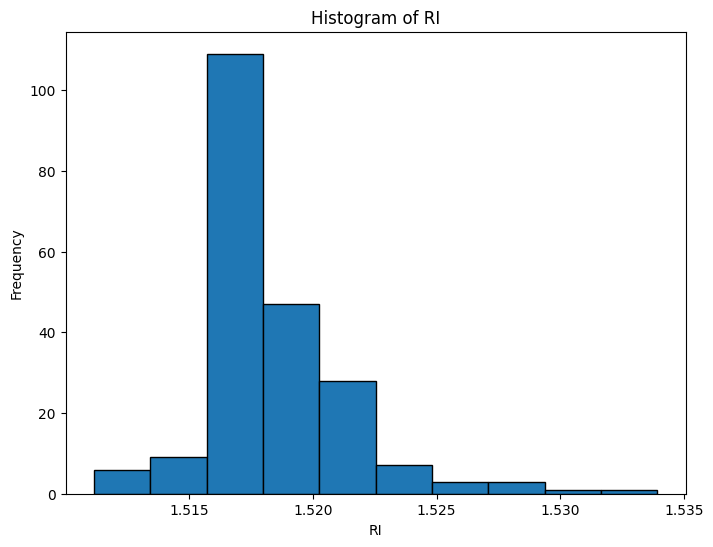

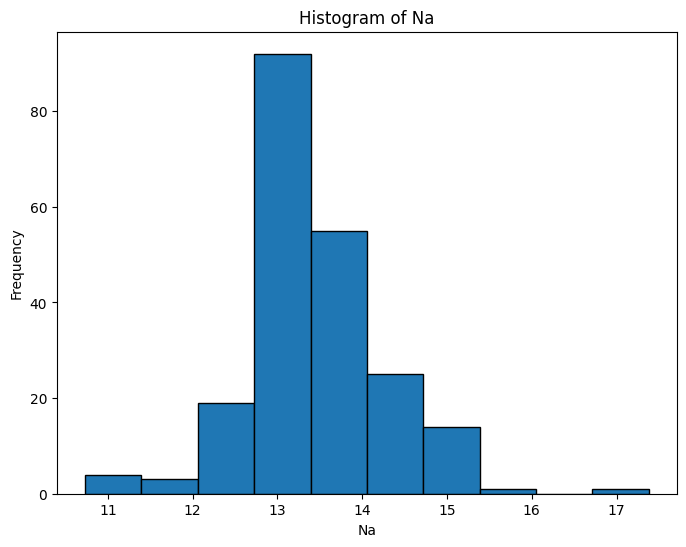

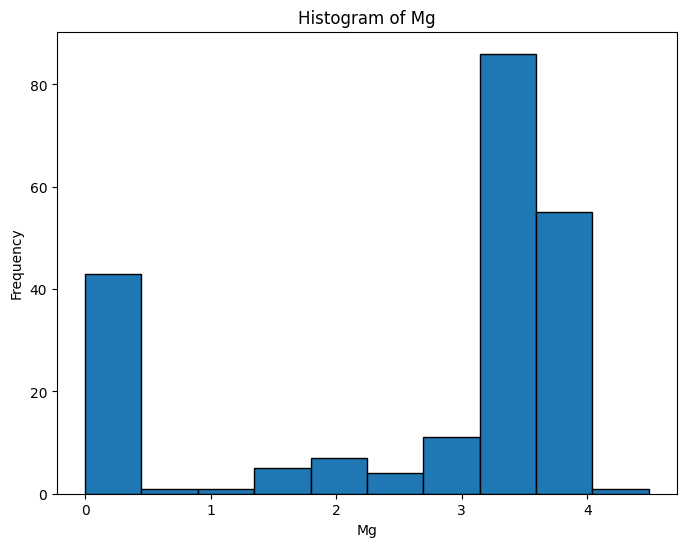

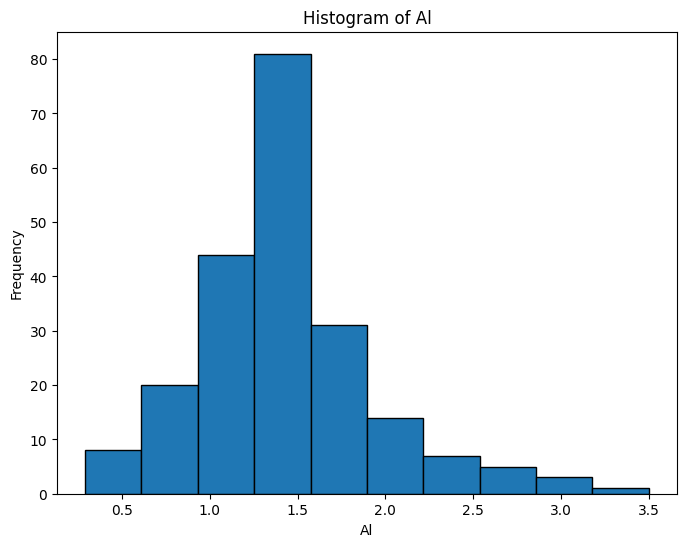

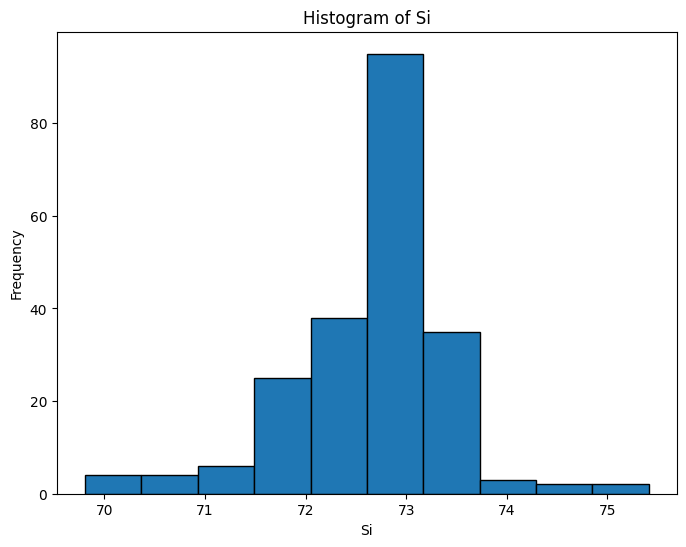

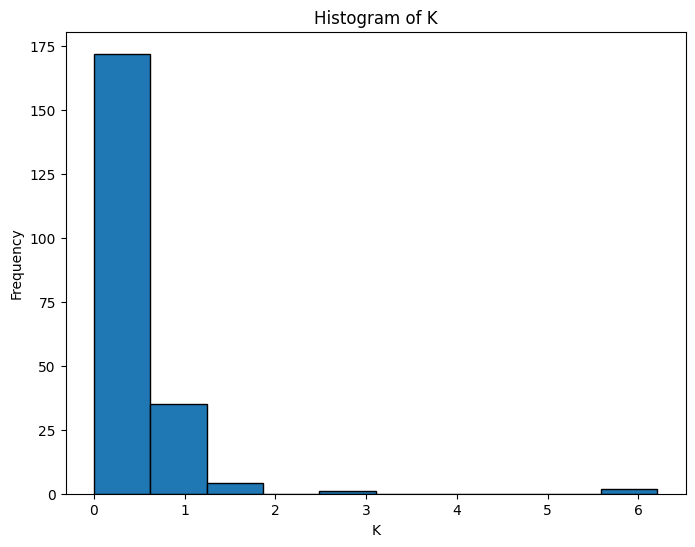

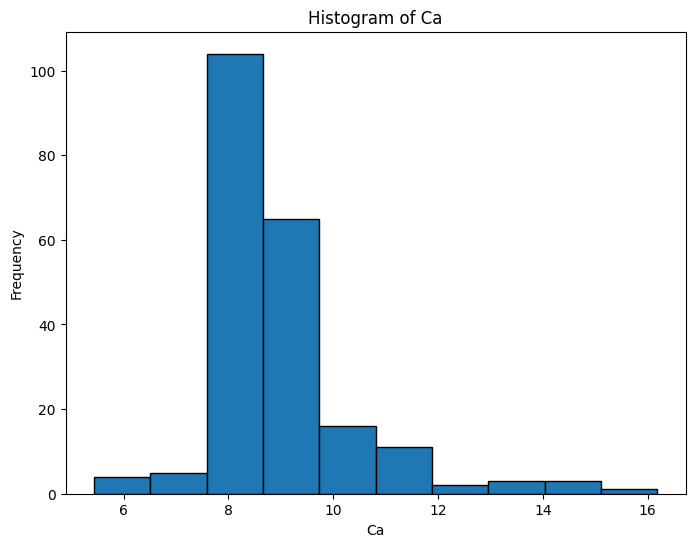

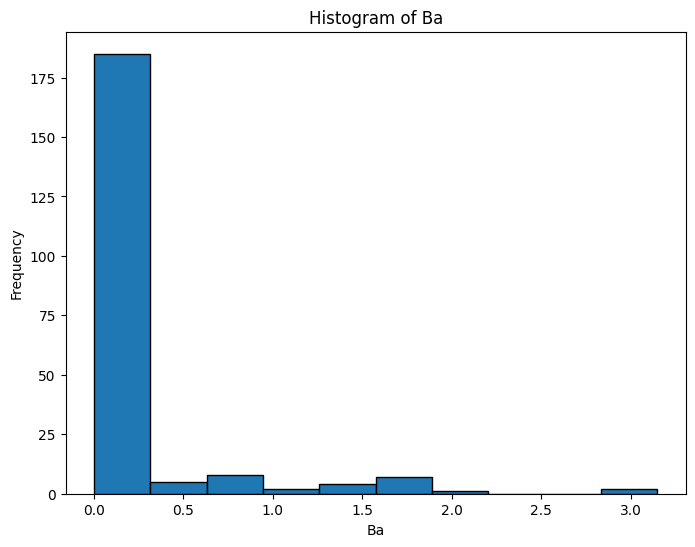

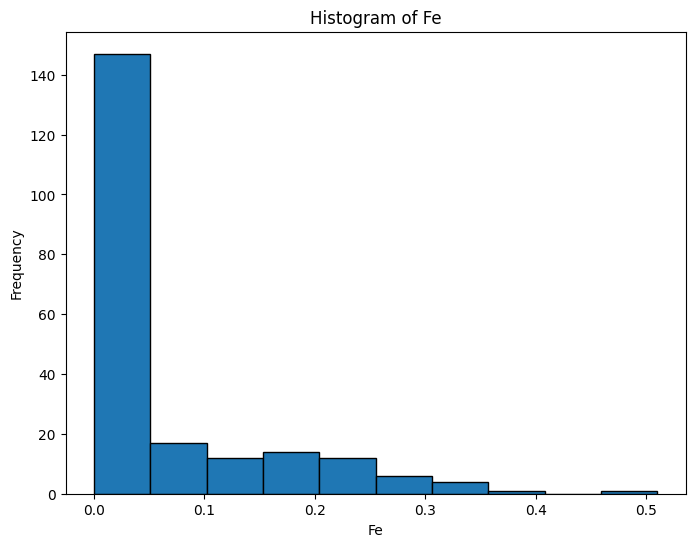

In [ ]:
# Create histograms for individual features
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=10, edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


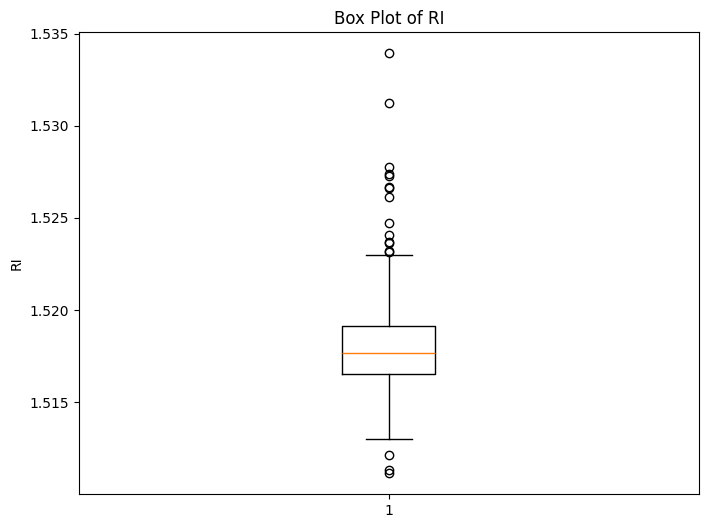

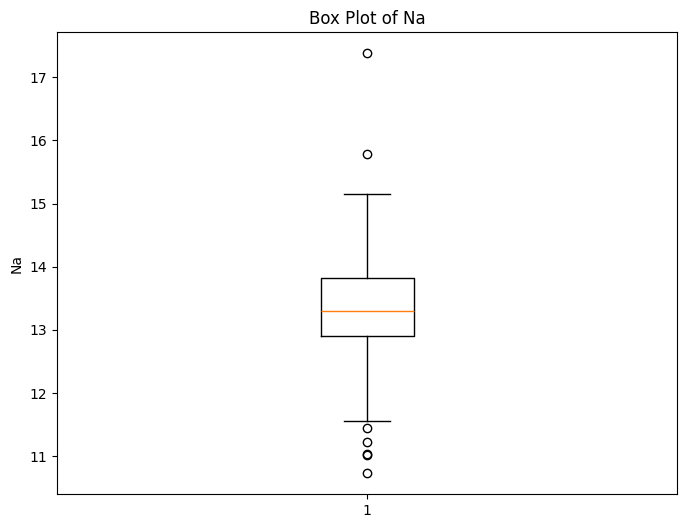

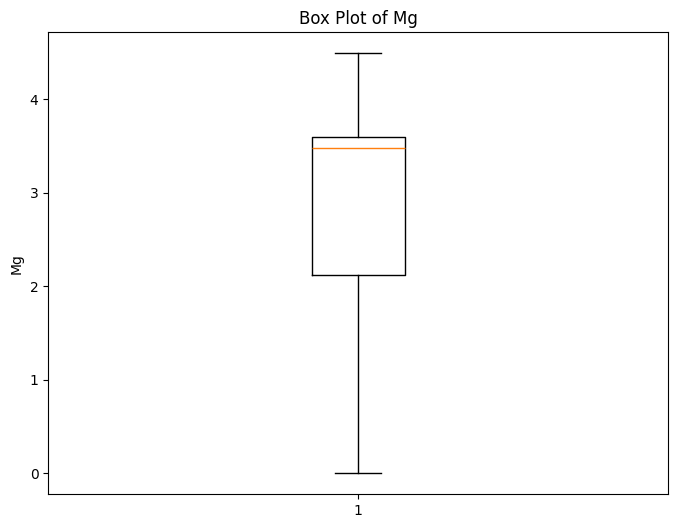

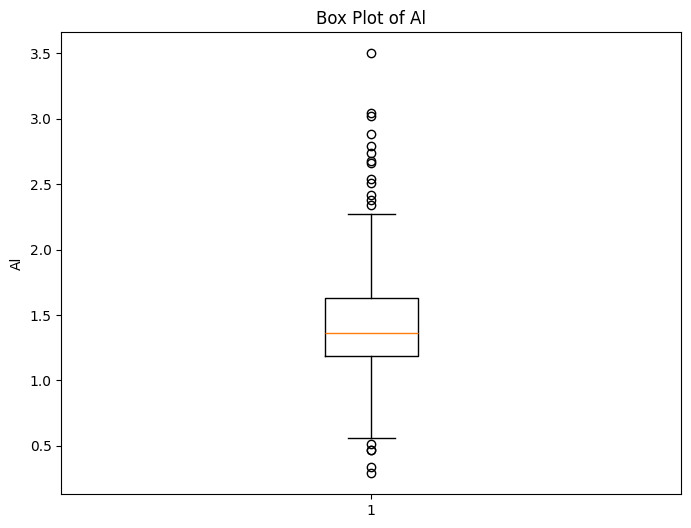

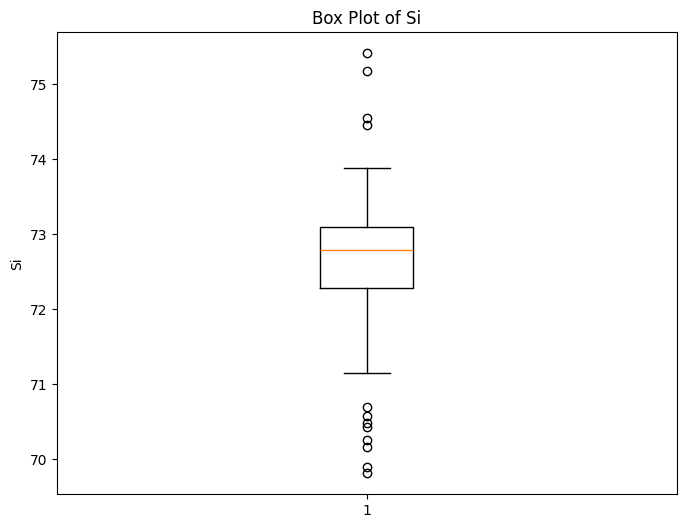

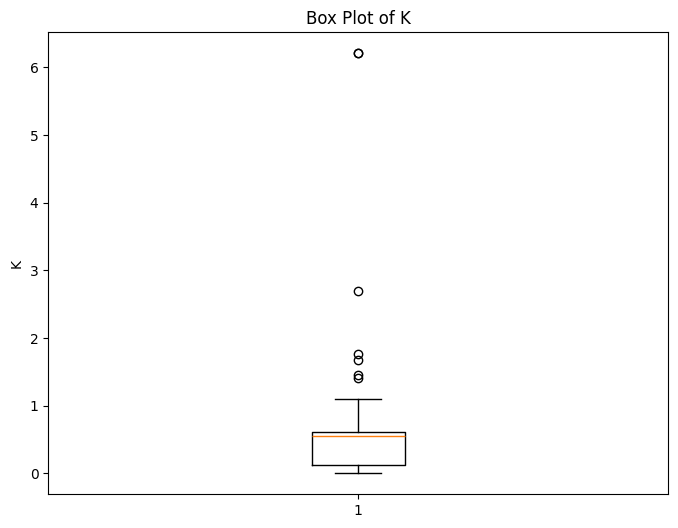

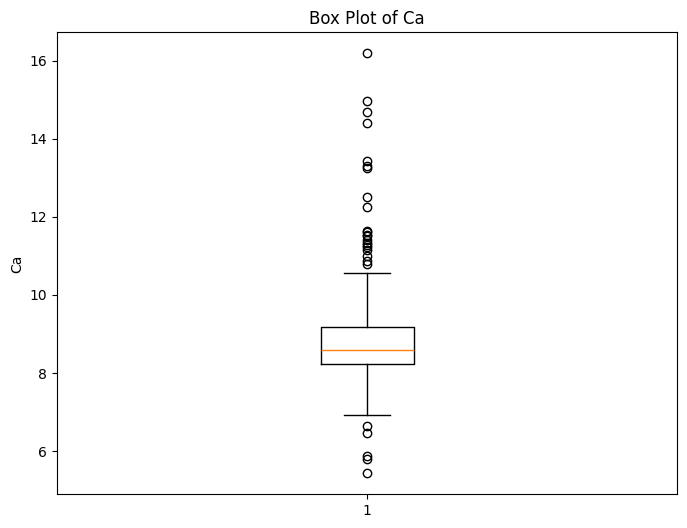

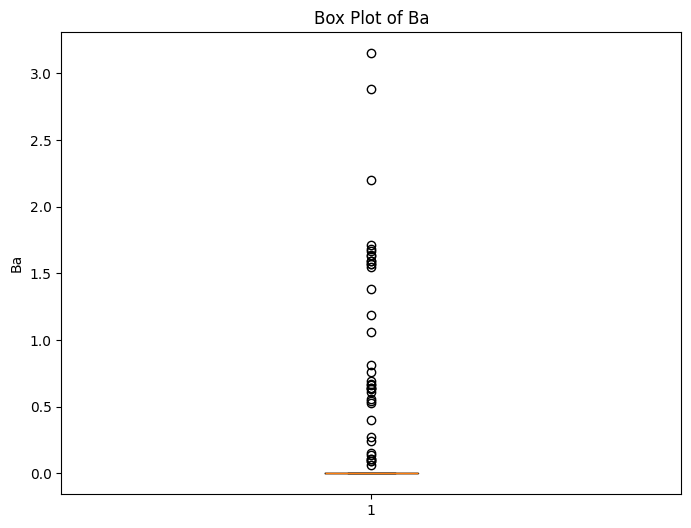

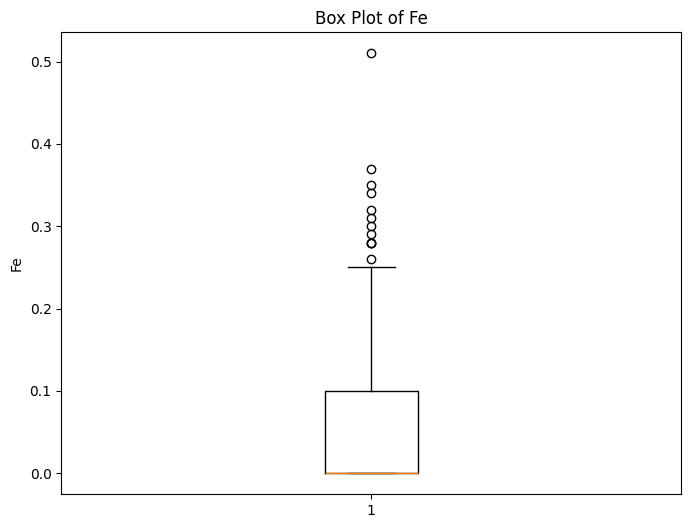

In [ ]:

# Create box plots for individual features
for column in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.ylabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

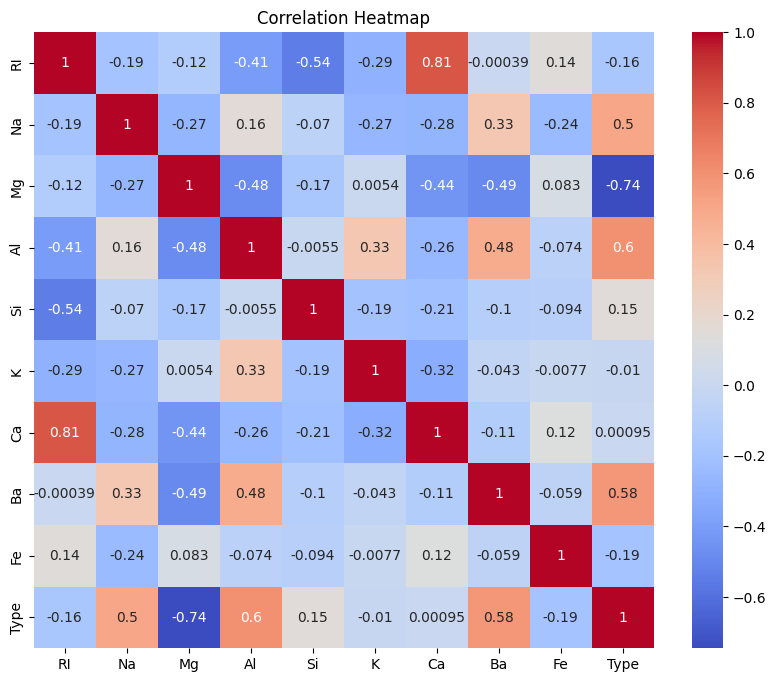

In [ ]:
# Analyze correlations using a heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

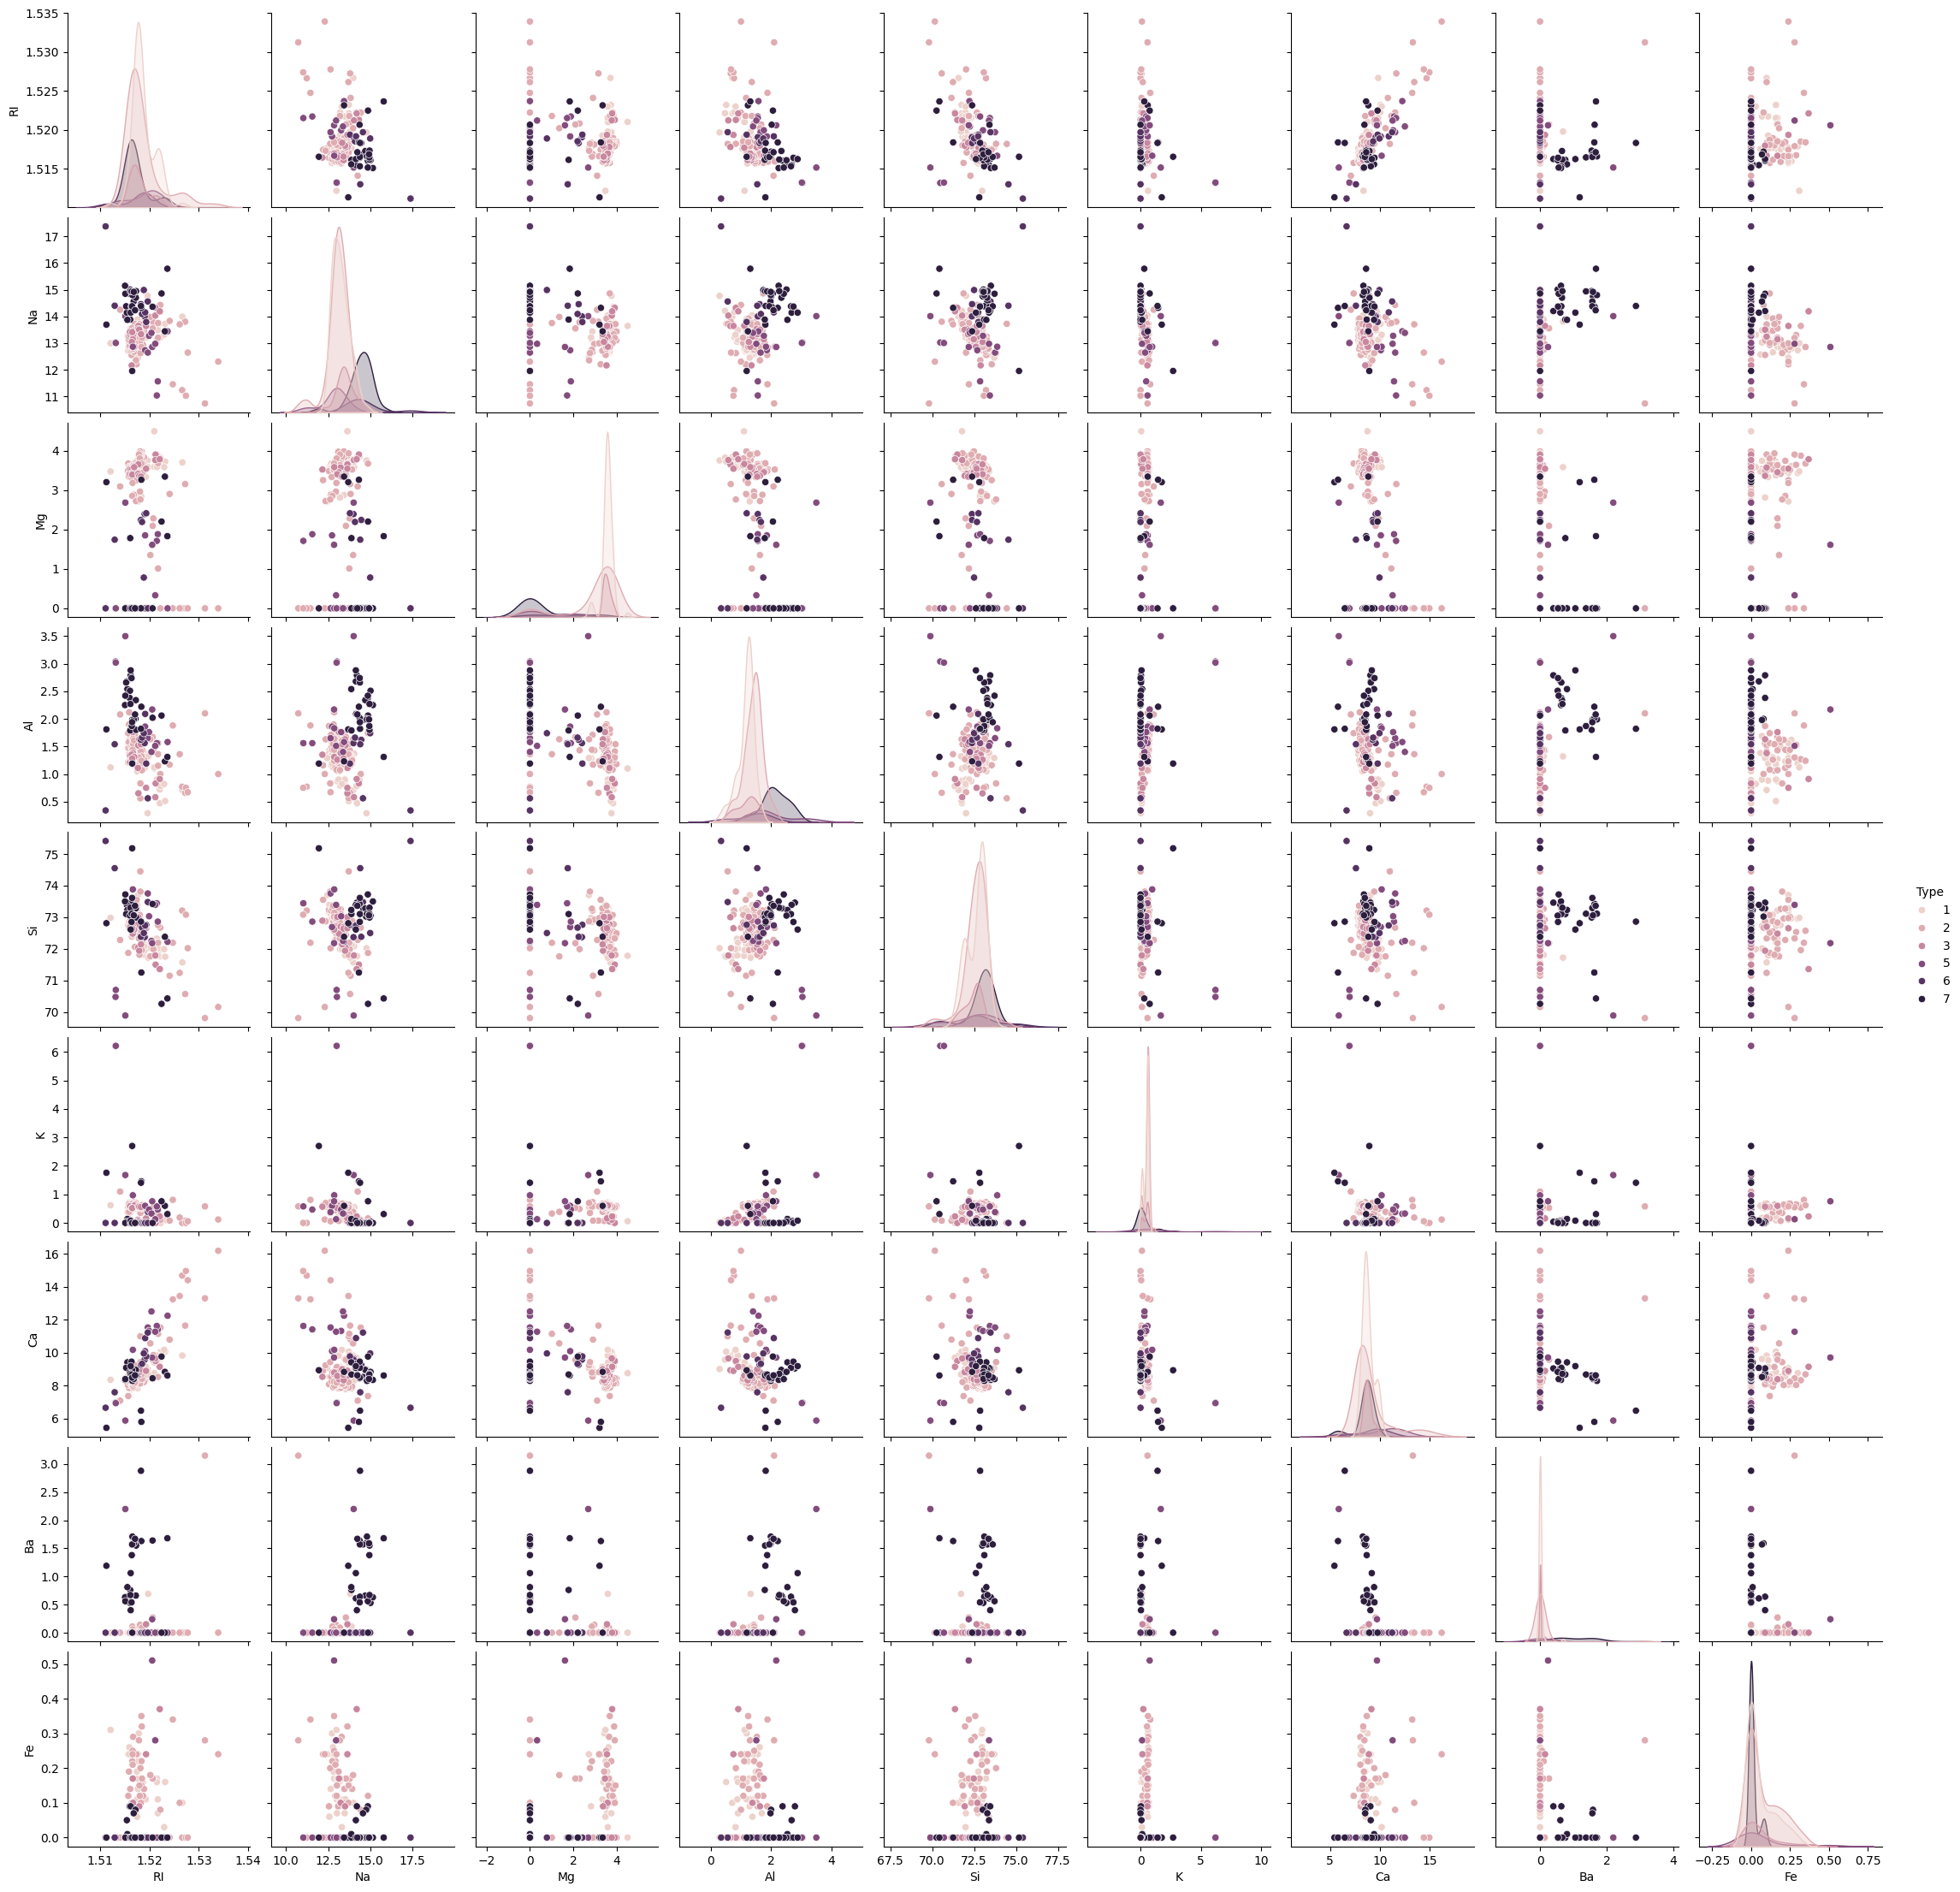

In [ ]:
sns.pairplot(df, hue='Type')
plt.show()

Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')

# Define the excel file path
excel_file = '/content/glass.xlsx'
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'glass']


In [ ]:
print(df.columns)

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [ ]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [ ]:
#Missing values
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [ ]:
imputations = df.mean()
df.fillna(imputations, inplace=True)

In [ ]:
total = df.isnull().sum().sum()
percent_missing = (total / len(df)) * 100  # Use 'total' instead of 'missing_values'
print("Percentage of missing values per column:")
print(percent_missing)

Percentage of missing values per column:
0.0


In [ ]:
# Remove rows with missing values
df_dropped_rows = df.dropna()

In [ ]:
# Remove columns with missing values
df_dropped_cols = df.dropna(axis=1)

In [ ]:
# Assuming 'RI' is a numerical column in your DataFrame that you want to impute
numerical_imputer = SimpleImputer(strategy='mean')

df['RI'] = numerical_imputer.fit_transform(df[['RI']])

In [ ]:
# Impute categorical columns with the mode
# Get a list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Assuming 'Type' is a categorical column you want to impute
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Loop through each categorical column and impute missing values
for col in categorical_cols:
    df[col] = categorical_imputer.fit_transform(df[[col]])

In [ ]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:")
print(categorical_columns)

Categorical columns:
Index([], dtype='object')


In [ ]:
df_one_hot_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_one_hot_encoded)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]


In [ ]:
df_original = df.copy()

In [ ]:
# Check columns in the DataFrame
print(df.columns)

df_original = pd.read_excel('/content/glass.xlsx', sheet_name='glass')

# Check for column names in the original data
print(df_original.columns)

# Try variations of the column name 'color'
for col in ['Color', 'color', 'Colour', 'colour']:
    if col in df_original.columns:
        label_encoder = LabelEncoder()
        df_original[f'{col}_Encoded'] = label_encoder.fit_transform(df_original[col])
        print(df_original)
        break
else:
    print("The column 'color' or any of its variations are not present in the dataset")

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'target'], dtype='object')
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')
The column 'color' or any of its variations are not present in the dataset


In [ ]:

ordinal_encoder = OrdinalEncoder()

ordinal_encoder = OrdinalEncoder()

if 'Type' in df.columns:
    df['Type_Encoded'] = ordinal_encoder.fit_transform(df[['Type']])
else:
    print("Neither 'Type' nor 'Type_Encoded' column found. Please check your DataFrame.")

df





Neither 'Type' nor 'Type_Encoded' column found. Please check your DataFrame.


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,target
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
# Apply standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
# Apply normalization
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

In [ ]:
if 'Type' in df.columns and 'target' not in df.columns:
    df.rename(columns={'Type': 'target'}, inplace=True)


X = df.drop('target', axis=1)  # Now drop the 'target' column
y = df['target']

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X, y)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
# Split data into features and target
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

Random Forest Model Implementation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')

# Define the excel file path
excel_file = '/content/glass.xlsx'
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'glass']


In [ ]:
if 'Type' in df.columns and 'target' not in df.columns:
    df.rename(columns={'Type': 'target'}, inplace=True)

# Now proceed with dropping the 'target' column
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
 #Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on test data
y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for multiclass data
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [ ]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.84
Precision: 0.87
Recall: 0.84
F1-Score: 0.83


In [ ]:
# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43



In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.7485380116959064


Bagging and Boosting Methods

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')

# Define the excel file path
excel_file = '/content/glass.xlsx'
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'glass']


In [ ]:
if 'target' not in df.columns and 'Type' in df.columns:
    df.rename(columns={'Type': 'target'}, inplace=True)

X = df.drop('target', axis=1)
y = df['target']

In [ ]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize a base model
base_model = DecisionTreeClassifier()

In [ ]:
# Bagging Classifier
bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

In [ ]:
# Train the model
bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=42)

In [ ]:
# Predict on test data
y_pred_bagging = bagging_model.predict(X_test)

In [ ]:
# Evaluate
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

In [ ]:
print("Bagging Results:")
print(f"Accuracy: {accuracy_bagging:.2f}")
print(f"Precision: {precision_bagging:.2f}")
print(f"Recall: {recall_bagging:.2f}")
print(f"F1-Score: {f1_bagging:.2f}")

Bagging Results:
Accuracy: 0.86
Precision: 0.87
Recall: 0.86
F1-Score: 0.85


In [ ]:
# Initialize AdaBoost
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Predict on test data
y_pred_adaboost = adaboost_model.predict(X_test)

In [ ]:
# Evaluate
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

In [ ]:
print("\nAdaBoost Results:")
print(f"Accuracy: {accuracy_adaboost:.2f}")
print(f"Precision: {precision_adaboost:.2f}")
print(f"Recall: {recall_adaboost:.2f}")
print(f"F1-Score: {f1_adaboost:.2f}")


AdaBoost Results:
Accuracy: 0.53
Precision: 0.45
Recall: 0.53
F1-Score: 0.47


In [ ]:
# Initialize Gradient Boosting
gradient_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gradient_model.fit(X_train, y_train)

# Predict on test data
y_pred_gradient = gradient_model.predict(X_test)


In [ ]:
# Evaluate
accuracy_gradient = accuracy_score(y_test, y_pred_gradient)
precision_gradient = precision_score(y_test, y_pred_gradient, average='weighted')
recall_gradient = recall_score(y_test, y_pred_gradient, average='weighted')
f1_gradient = f1_score(y_test, y_pred_gradient, average='weighted')

In [ ]:
print("\nGradient Boosting Results:")
print(f"Accuracy: {accuracy_gradient:.2f}")
print(f"Precision: {precision_gradient:.2f}")
print(f"Recall: {recall_gradient:.2f}")
print(f"F1-Score: {f1_gradient:.2f}")


Gradient Boosting Results:
Accuracy: 0.86
Precision: 0.88
Recall: 0.86
F1-Score: 0.85


In [ ]:
# Summarize results
results = {
    "Model": ["Bagging", "AdaBoost", "Gradient Boosting"],
    "Accuracy": [accuracy_bagging, accuracy_adaboost, accuracy_gradient],
    "Precision": [precision_bagging, precision_adaboost, precision_gradient],
    "Recall": [recall_bagging, recall_adaboost, recall_gradient],
    "F1-Score": [f1_bagging, f1_adaboost, f1_gradient],
}


In [ ]:
results_df = pd.DataFrame(results)
print("\nComparison of Results:")
print(results_df)


Comparison of Results:
               Model  Accuracy  Precision    Recall  F1-Score
0            Bagging  0.860465   0.867301  0.860465  0.853667
1           AdaBoost  0.534884   0.450280  0.534884  0.472396
2  Gradient Boosting  0.860465   0.879937  0.860465  0.850129


Additional Notes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification

In [ ]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')

# Define the excel file path
excel_file = '/content/glass.xlsx'
sheet_names = pd.ExcelFile(excel_file).sheet_names
print("Sheets in the file:", sheet_names)

Sheets in the file: ['Description', 'glass']


In [ ]:

#Create imbalanced dataset
X, y = make_classification(n_classes=2, weights=[0.9, 0.1], n_samples=1000, n_features=20, random_state=42)

In [ ]:
 #Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#Train models
# Bagging (Random Forest)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# Boosting (AdaBoost)
adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_model.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(random_state=42)

In [ ]:

#Evaluate models
print("Random Forest Results:")
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]):.2f}")

Random Forest Results:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       180
           1       0.72      0.65      0.68        20

    accuracy                           0.94       200
   macro avg       0.84      0.81      0.83       200
weighted avg       0.94      0.94      0.94       200

ROC-AUC Score: 0.88


In [ ]:


print("\nAdaBoost Results:")
y_pred_adaboost = adaboost_model.predict(X_test)
print(classification_report(y_test, y_pred_adaboost))
print(f"ROC-AUC Score: {roc_auc_score(y_test, adaboost_model.predict_proba(X_test)[:, 1]):.2f}")



AdaBoost Results:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       180
           1       0.52      0.70      0.60        20

    accuracy                           0.91       200
   macro avg       0.74      0.81      0.77       200
weighted avg       0.92      0.91      0.91       200

ROC-AUC Score: 0.84


INTERVIEW QUESTIONS

Boosting is another ensemble technique that reduces both bias and variance by training models sequentially. Each model corrects the errors of the previous one, with misclassified samples receiving more attention. The final prediction is a weighted sum of all model outputs.

"Imbalanced data occurs when one class significantly outweighs the other, leading to biased models that favor the majority class. For example, in fraud detection, the fraudulent transactions (minority class) might be overshadowed by non-fraudulent ones."